<a href="https://colab.research.google.com/github/Jaehwi-So/DeepLearning_Study/blob/main/DL03_CNN1_LeNet5_MNIST%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import numpy as np
import os

%load_ext autoreload
%autoreload 2

os.chdir('drive/MyDrive/DL2024_201810776/week10')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# MNIST 데이터 로드 및 전처리


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Layer, AveragePooling2D, Input, BatchNormalization, ReLU,  Add, GlobalAveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

# 28x28 사이즈의 이미지 -> Train/Test Set으로 분리
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255 # 0~255 정규화
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

(60000, 28, 28)


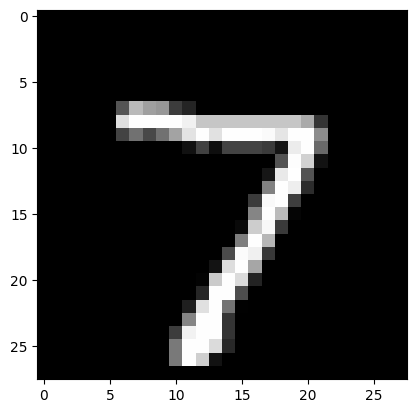

In [5]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [6]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# CNN 모델 생성
- MNIST 손글씨 이미지 데이터는 28x28이다. 따라서 LeNet5의 Input이 32x32이기 때문에 처음에는 패딩을 적용해준다.
- LeNet5의 구성과 같이 C1, S1, C2, S2, C3, F1, F2의 Layer를 적용해준다.
- 입출력 차원에 유의한다.

In [9]:
# 모델 생성
model = Sequential([

    # C1 : Convolution Layer
    # Input : 28X28 * 1
    # 커널 사이즈 : 5X5 * 6
    # Output : 28X28 * 6
    Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='relu', input_shape=(28, 28, 1), padding='same'),

    # S1 : Subsampling (Pooling)
    # Input : 28X28 * 6
    # Output : 14X14 * 6
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    # C2 : Convolution Layer
    # Input : 14X14 * 6
    # 커널 사이즈 : 5X5 * 16
    # Output : 10X10 * 16
    Conv2D(16, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='valid'),

    # S2 : Subsampling (Pooling)
    # Input : 10X10 * 16
    # Output : 5X5 * 16
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),


    # C3 : Convolution Layer
    # Input : 5X5 * 16
    # 커널 사이즈 : 5X5 * 120
    # Output : 1X1 * 120
    Conv2D(120, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='valid'),
    Flatten(), # 합성곱(Convolution)과 풀링(Pooling) 레이어를 거친 후에 나오는 다차원의 특징 맵을 1차원으로 변환(Flatten)하여 Fully Connected Layer에 연결

    # F1 : Fully Connected Layer
    # Input : 1X1 * 120
    # Output : 1X1 * 84
    Dense(84, activation='relu'),

    # F2 : Fully Connected Layer
    # Input : 1X1 * 84
    # Output : 1X1 * 10
    Dense(10, activation='softmax') #10개의 카테고리(숫자 0~9)에 대한 뉴런으로 현재 이미지가 각각의 숫자일 확률이 출력으로 나온다.

])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

# 모델 학습
- 다중 카테고리 분류이므로 Categorical Cross Entropy를 Loss로 사용한다
- Optimizer로는 ADAM을 사용한다.

In [12]:
# 학습
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 4s 5ms/step - loss: 0.1007 - accuracy: 0.9681 - val_loss: 0.0830 - val_accuracy: 0.9747
Epoch 2/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0694 - accuracy: 0.9788 - val_loss: 0.0558 - val_accuracy: 0.9848
Epoch 3/50
422/422 [==============================] - 3s 7ms/step - loss: 0.0567 - accuracy: 0.9820 - val_loss: 0.0549 - val_accuracy: 0.9835
Epoch 4/50
422/422 [==============================] - 3s 7ms/step - loss: 0.0477 - accuracy: 0.9848 - val_loss: 0.0545 - val_accuracy: 0.9845
Epoch 5/50
422/422 [==============================] - 3s 7ms/step - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.0441 - val_accuracy: 0.9892
Epoch 6/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0501 - val_accuracy: 0.9875
Epoch 7/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0301 - accuracy: 0.9901 - val_loss: 0.0485 - val_accuracy: 0.9853
Epoch 

# Test Set에 대한 예측 및 모델 평가

313/313 [==============================] - 1s 2ms/step


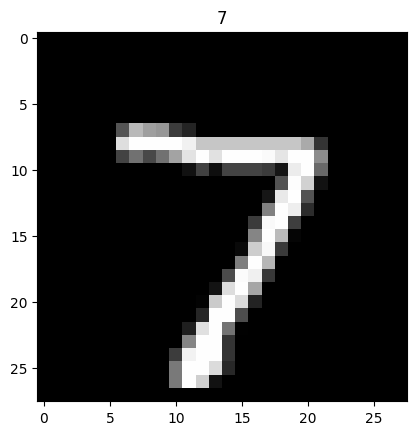

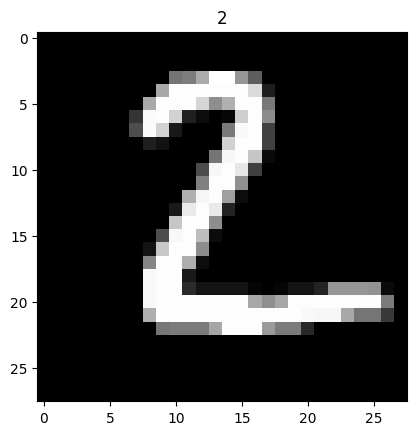

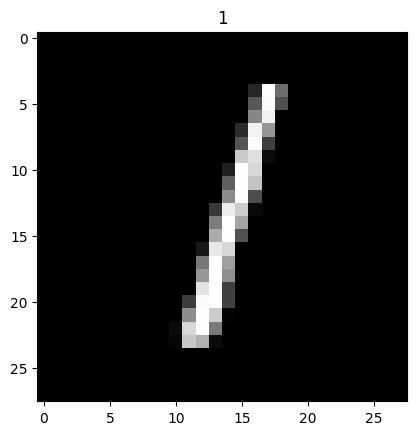

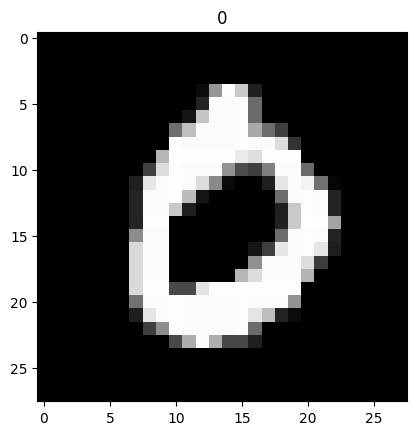

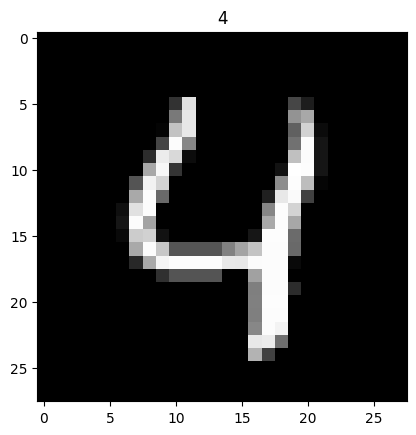

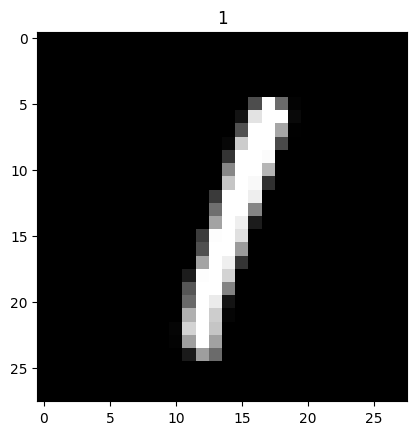

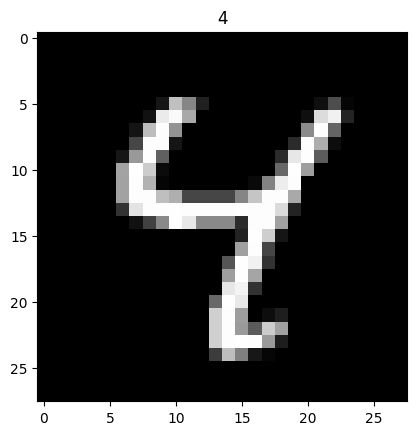

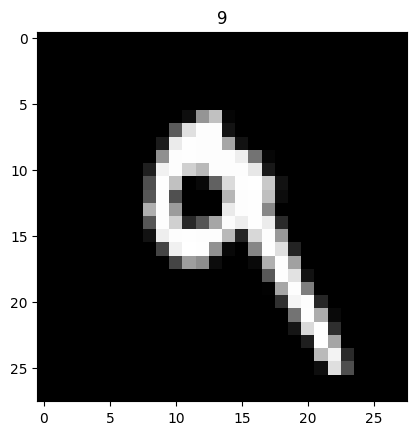

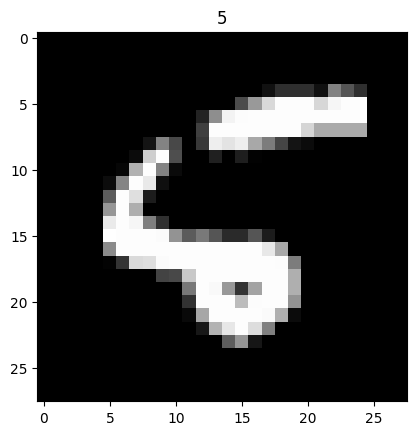

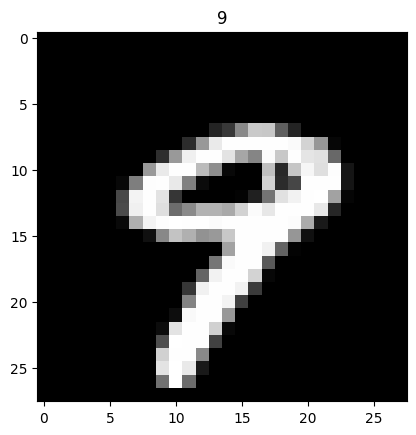

In [13]:
# 예측
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

for idx in range(10):
  plt.title(str(np.argmax(y_pred[idx])))
  plt.imshow(x_test[idx], cmap='gray')
  plt.show()

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
accuracy

0.988